### 数据的整理
1. groupby 和sql语句里的groupby相同

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [7]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.020535,0.010534
1,bar,one,0.225896,-1.324412
2,foo,two,0.285903,0.379219
3,bar,three,0.362259,-1.236021
4,foo,two,0.687361,-2.003919
5,bar,two,1.521162,-0.693212
6,foo,one,1.491396,0.253644
7,foo,three,-1.586160,0.667157


In [8]:
# 分组和在各列上应用不同函数
df.groupby('A').agg({'C': max, 'D': min})

,C,D
A,,
bar,1.521162,-1.324412
foo,1.491396,-2.003919


In [10]:
# 求分组后的最大值
df.groupby('A').max()

,B,C,D
A,,,
bar,two,1.521162,-0.693212
foo,two,1.491396,0.667157


In [25]:
df.groupby('A').agg([max, min])

B              C                   D          
     max  min       max       min       max       min
A                                                    
bar  two  one  1.521162  0.225896 -0.693212 -1.324412
foo  two  one  1.491396 -1.586160  0.667157 -2.003919

In [14]:
gp = df.groupby('A')

In [15]:
gp

In [23]:
# 对group结果应用多个函数
gp.agg([np.sum, np.mean, np.std])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar  2.109318  0.703106  0.711731 -3.253645 -1.084548  0.341777
foo -0.142034 -0.028407  1.258156 -0.693364 -0.138673  1.069216

In [26]:
# 对单个列进行计算
df.groupby('A')['C'].agg([np.sum, np.mean, np.std])

,sum,mean,std
A,,,
bar,2.109318,0.703106,0.711731
foo,-0.142034,-0.028407,1.258156


In [29]:
# 多列数据进行分组
df.groupby(['A','B']).mean()

C         D
A   B                        
bar one    0.225896 -1.324412
    three  0.362259 -1.236021
    two    1.521162 -0.693212
foo one    0.235431  0.132089
    three -1.586160  0.667157
    two    0.486632 -0.812350

#### 遍历groupby的结果

In [31]:
for name, group in df.groupby('A'):
    print(name)
    print(group)

bar
     A      B         C         D
1  bar    one  0.225896 -1.324412
3  bar  three  0.362259 -1.236021
5  bar    two  1.521162 -0.693212
foo
     A      B         C         D
0  foo    one -1.020535  0.010534
2  foo    two  0.285903  0.379219
4  foo    two  0.687361 -2.003919
6  foo    one  1.491396  0.253644
7  foo  three -1.586160  0.667157


In [34]:
for name, group in df.groupby(['A','B']):
    print(name)
    print(group)
    print('\n')

('bar', 'one')
     A    B         C         D
1  bar  one  0.225896 -1.324412


('bar', 'three')
     A      B         C         D
3  bar  three  0.362259 -1.236021


('bar', 'two')
     A    B         C         D
5  bar  two  1.521162 -0.693212


('foo', 'one')
     A    B         C         D
0  foo  one -1.020535  0.010534
6  foo  one  1.491396  0.253644


('foo', 'three')
     A      B        C         D
7  foo  three -1.58616  0.667157


('foo', 'two')
     A    B         C         D
2  foo  two  0.285903  0.379219
4  foo  two  0.687361 -2.003919




In [36]:
gp = df.groupby(['A','B'])
gp.get_group(('foo','two'))

,A,B,C,D
2,foo,two,0.285903,0.379219
4,foo,two,0.687361,-2.003919


In [41]:
# gp.get_group(('foo',))
gp.get_group(('foo','one'))

,C,D
0,-1.020535,0.010534
6,1.491396,0.253644


+ 查看每个月的最高温度、最低温度、平均空气质量指数

In [44]:
fpath = "../datas/beijing_tianqi/beijing_tianqi_2018.csv"
df = pd.read_csv(fpath)
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3℃,-6℃,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2℃,-5℃,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2℃,-5℃,多云,北风,1-2级,28,优,1
3,2018-01-04,0℃,-8℃,阴,东北风,1-2级,28,优,1
4,2018-01-05,3℃,-6℃,多云~晴,西北风,1-2级,50,优,1


In [45]:
df['hw'] = df['bWendu'].str.replace('℃','').astype('int32')
df['lw'] = df['yWendu'].str.replace('℃','').astype('int32')
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,hw,lw
0,2018-01-01,3℃,-6℃,晴~多云,东北风,1-2级,59,良,2,3,-6
1,2018-01-02,2℃,-5℃,阴~多云,东北风,1-2级,49,优,1,2,-5
2,2018-01-03,2℃,-5℃,多云,北风,1-2级,28,优,1,2,-5
3,2018-01-04,0℃,-8℃,阴,东北风,1-2级,28,优,1,0,-8
4,2018-01-05,3℃,-6℃,多云~晴,西北风,1-2级,50,优,1,3,-6


In [48]:
df.set_index(pd.to_datetime(df['ymd']), inplace=True)
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,hw,lw
ymd,,,,,,,,,,,
2018-01-01,2018-01-01,3℃,-6℃,晴~多云,东北风,1-2级,59,良,2,3,-6
2018-01-02,2018-01-02,2℃,-5℃,阴~多云,东北风,1-2级,49,优,1,2,-5
2018-01-03,2018-01-03,2℃,-5℃,多云,北风,1-2级,28,优,1,2,-5
2018-01-04,2018-01-04,0℃,-8℃,阴,东北风,1-2级,28,优,1,0,-8
2018-01-05,2018-01-05,3℃,-6℃,多云~晴,西北风,1-2级,50,优,1,3,-6


In [50]:
df.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='ymd', length=365)

In [52]:
# 查询每个月最高温度
data = df.groupby(df.index.month)['hw'].max()

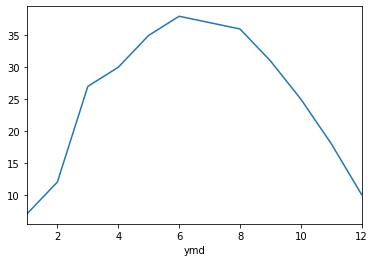

In [53]:
data.plot()

In [59]:
mdata = df.groupby(df.index.month).agg({'hw': max, 'lw': min, 'aqi': np.mean})

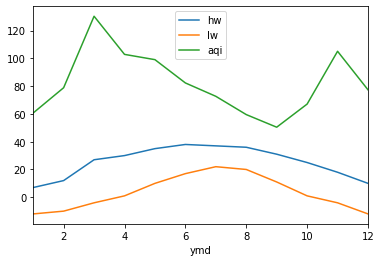

In [60]:
mdata.plot()

In [63]:
df.index.dayofyear

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            356, 357, 358, 359, 360, 361, 362, 363, 364, 365],
           dtype='int64', name='ymd', length=365)

### 多重索引
1. Series的多重索引
2. DataFrame的多重索引

In [68]:
stocks = pd.read_excel('../datas/stocks/互联网公司股票-02.xlsx')
stocks.head()

,日期,公司,收盘,开盘,高,低,交易量,涨跌幅
0,2019-10-10,BIDU,103.85,100.79,104.74,100.26,3.56,0.04
1,2019-10-09,BIDU,99.90,100.29,100.63,98.55,3.41,0.00
2,2019-10-08,BIDU,99.53,99.50,100.56,98.20,4.43,-0.02
3,2019-10-07,BIDU,101.47,103.79,103.99,101.17,3.40,-0.03
4,2019-10-04,BIDU,104.47,103.83,105.10,103.29,1.69,0.00


In [70]:
se = stocks.groupby(['公司','日期'])['收盘'].mean()
se

公司    日期        
BABA  2019-10-01    165.15
      2019-10-02    165.77
      2019-10-03    169.48
      2019-10-04    170.34
      2019-10-07    168.32
      2019-10-08    161.93
      2019-10-09    165.19
      2019-10-10    166.07
BIDU  2019-10-01    102.00
      2019-10-02    102.62
      2019-10-03    104.32
      2019-10-04    104.47
      2019-10-07    101.47
      2019-10-08     99.53
      2019-10-09     99.90
      2019-10-10    103.85
IQ    2019-10-01     15.92
      2019-10-02     15.72
      2019-10-03     16.06
      2019-10-04     16.39
      2019-10-07     16.18
      2019-10-08     15.69
      2019-10-09     15.74
      2019-10-10     15.71
JD    2019-10-01     28.19
      2019-10-02     28.06
      2019-10-03     28.80
      2019-10-04     28.99
      2019-10-07     28.85
      2019-10-08     27.73
      2019-10-09     28.38
      2019-10-10     28.58
Name: 收盘, dtype: float64

In [72]:
# 二级索引变为列
unse = se.unstack()
unse

日期,2019-10-01,2019-10-02,2019-10-03,2019-10-04,2019-10-07,2019-10-08,2019-10-09,2019-10-10
公司,,,,,,,,
BABA,165.15,165.77,169.48,170.34,168.32,161.93,165.19,166.07
BIDU,102.00,102.62,104.32,104.47,101.47,99.53,99.90,103.85
IQ,15.92,15.72,16.06,16.39,16.18,15.69,15.74,15.71
JD,28.19,28.06,28.80,28.99,28.85,27.73,28.38,28.58


In [75]:
# 二维变一维数据
unse.stack()

公司    日期        
BABA  2019-10-01    165.15
      2019-10-02    165.77
      2019-10-03    169.48
      2019-10-04    170.34
      2019-10-07    168.32
      2019-10-08    161.93
      2019-10-09    165.19
      2019-10-10    166.07
BIDU  2019-10-01    102.00
      2019-10-02    102.62
      2019-10-03    104.32
      2019-10-04    104.47
      2019-10-07    101.47
      2019-10-08     99.53
      2019-10-09     99.90
      2019-10-10    103.85
IQ    2019-10-01     15.92
      2019-10-02     15.72
      2019-10-03     16.06
      2019-10-04     16.39
      2019-10-07     16.18
      2019-10-08     15.69
      2019-10-09     15.74
      2019-10-10     15.71
JD    2019-10-01     28.19
      2019-10-02     28.06
      2019-10-03     28.80
      2019-10-04     28.99
      2019-10-07     28.85
      2019-10-08     27.73
      2019-10-09     28.38
      2019-10-10     28.58
dtype: float64

In [78]:
# 铺平索引，二维索引变一维索引
se.reset_index()

,公司,日期,收盘
0,BABA,2019-10-01,165.15
1,BABA,2019-10-02,165.77
2,BABA,2019-10-03,169.48
3,BABA,2019-10-04,170.34
4,BABA,2019-10-07,168.32
5,BABA,2019-10-08,161.93
6,BABA,2019-10-09,165.19
7,BABA,2019-10-10,166.07
8,BIDU,2019-10-01,102.00
9,BIDU,2019-10-02,102.62


In [84]:
# 查看具体日期所有公司数据
se[(slice(None),'2019-10-01')]

公司
BABA    165.15
BIDU    102.00
IQ       15.92
JD       28.19
Name: 收盘, dtype: float64

In [85]:
# 查看标签数据
se['JD']

日期
2019-10-01    28.19
2019-10-02    28.06
2019-10-03    28.80
2019-10-04    28.99
2019-10-07    28.85
2019-10-08    27.73
2019-10-09    28.38
2019-10-10    28.58
Name: 收盘, dtype: float64

In [87]:
se[['JD','IQ']]

公司  日期        
IQ  2019-10-01    15.92
    2019-10-02    15.72
    2019-10-03    16.06
    2019-10-04    16.39
    2019-10-07    16.18
    2019-10-08    15.69
    2019-10-09    15.74
    2019-10-10    15.71
JD  2019-10-01    28.19
    2019-10-02    28.06
    2019-10-03    28.80
    2019-10-04    28.99
    2019-10-07    28.85
    2019-10-08    27.73
    2019-10-09    28.38
    2019-10-10    28.58
Name: 收盘, dtype: float64

In [93]:
# 查询多个公司，多个日期数据
se.loc[(['JD','IQ'],['2019-10-09', '2019-10-01'])]

公司  日期        
IQ  2019-10-01    15.92
    2019-10-09    15.74
JD  2019-10-01    28.19
    2019-10-09    28.38
Name: 收盘, dtype: float64

In [102]:
se.loc[(slice(None), ['2019-10-01','2019-10-09'])]

公司    日期        
BABA  2019-10-01    165.15
      2019-10-09    165.19
BIDU  2019-10-01    102.00
      2019-10-09     99.90
IQ    2019-10-01     15.92
      2019-10-09     15.74
JD    2019-10-01     28.19
      2019-10-09     28.38
Name: 收盘, dtype: float64

In [114]:
# se[:, '2019-10-01']等同于下面的
se[slice(None),'2019-10-01']

公司
BABA    165.15
BIDU    102.00
IQ       15.92
JD       28.19
Name: 收盘, dtype: float64

In [115]:
stocks.set_index(['公司', '日期'], inplace=True)
stocks

收盘      开盘       高       低    交易量   涨跌幅
公司   日期                                                     
BIDU 2019-10-10  103.85  100.79  104.74  100.26   3.56  0.04
     2019-10-09   99.90  100.29  100.63   98.55   3.41  0.00
     2019-10-08   99.53   99.50  100.56   98.20   4.43 -0.02
     2019-10-07  101.47  103.79  103.99  101.17   3.40 -0.03
     2019-10-04  104.47  103.83  105.10  103.29   1.69  0.00
     2019-10-03  104.32  102.35  104.73  101.15   2.24  0.02
     2019-10-02  102.62  100.85  103.24   99.50   2.69  0.01
     2019-10-01  102.00  102.80  103.26  101.00   1.78 -0.01
BABA 2019-10-10  166.07  165.96  168.57  164.09  11.54  0.01
     2019-10-09  165.19  165.50  166.58  163.42  11.19  0.02
     2019-10-08  161.93  164.30  165.22  161.68  15.94 -0.04
     2019-10-07  168.32  168.83  172.30  167.21  12.03 -0.01
     2019-10-04  170.34  169.60  170.70  167.56   8.86  0.01
     2019-10-03  169.48  166.65  170.18  165.00  10.39  0.02
     2019-10-02  165.77  162.82  166.88  161.90  11.60  0.00
     2019-10-01  165.15  168.01  168.23  163.64  14.19 -0.01
IQ   2019-10-10   15.71   15.74   15.90   15.53   5.58  0.00
     2019-10-09   15.74   15.95   16.08   15.64   4.07  0.00
     2019-10-08   15.69   15.90   15.98   15.55   5.66 -0.03
     2019-10-07   16.18   16.29   16.50   15.90   6.10 -0.01
     2019-10-04   16.39   16.12   16.90   16.10   7.23  0.02
     2019-10-03   16.06   15.71   16.38   15.32  10.08  0.02
     2019-10-02   15.72   15.85   15.87   15.12   8.10 -0.01
     2019-10-01   15.92   16.14   16.22   15.50  11.65 -0.01
JD   2019-10-10   28.58   28.32   28.95   28.20   8.21  0.01
     2019-10-09   28.38   28.28   28.60   27.96   8.45  0.02
     2019-10-08   27.73   28.19   28.61   27.72  11.74 -0.04
     2019-10-07   28.85   28.84   29.40   28.60   9.09  0.00
     2019-10-04   28.99   28.88   29.19   28.65   7.43  0.01
     2019-10-03   28.80   28.11   28.97   27.82   8.77  0.03
     2019-10-02   28.06   28.00   28.22   27.53   9.53  0.00
     2019-10-01   28.19   28.22   28.57   27.97  10.64  0.00

In [125]:
stocks.loc['BABA']

,收盘,开盘,高,低,交易量,涨跌幅
日期,,,,,,
2019-10-10,166.07,165.96,168.57,164.09,11.54,0.01
2019-10-09,165.19,165.50,166.58,163.42,11.19,0.02
2019-10-08,161.93,164.30,165.22,161.68,15.94,-0.04
2019-10-07,168.32,168.83,172.30,167.21,12.03,-0.01
2019-10-04,170.34,169.60,170.70,167.56,8.86,0.01
2019-10-03,169.48,166.65,170.18,165.00,10.39,0.02
2019-10-02,165.77,162.82,166.88,161.90,11.60,0.00
2019-10-01,165.15,168.01,168.23,163.64,14.19,-0.01


In [131]:
# 获取公司收盘价
stocks.loc[['BABA', 'JD']]['收盘']

公司    日期        
BABA  2019-10-10    166.07
      2019-10-09    165.19
      2019-10-08    161.93
      2019-10-07    168.32
      2019-10-04    170.34
      2019-10-03    169.48
      2019-10-02    165.77
      2019-10-01    165.15
JD    2019-10-10     28.58
      2019-10-09     28.38
      2019-10-08     27.73
      2019-10-07     28.85
      2019-10-04     28.99
      2019-10-03     28.80
      2019-10-02     28.06
      2019-10-01     28.19
Name: 收盘, dtype: float64

In [132]:
stocks.sort_index(inplace=True)
stocks

收盘      开盘       高       低    交易量   涨跌幅
公司   日期                                                     
BABA 2019-10-01  165.15  168.01  168.23  163.64  14.19 -0.01
     2019-10-02  165.77  162.82  166.88  161.90  11.60  0.00
     2019-10-03  169.48  166.65  170.18  165.00  10.39  0.02
     2019-10-04  170.34  169.60  170.70  167.56   8.86  0.01
     2019-10-07  168.32  168.83  172.30  167.21  12.03 -0.01
     2019-10-08  161.93  164.30  165.22  161.68  15.94 -0.04
     2019-10-09  165.19  165.50  166.58  163.42  11.19  0.02
     2019-10-10  166.07  165.96  168.57  164.09  11.54  0.01
BIDU 2019-10-01  102.00  102.80  103.26  101.00   1.78 -0.01
     2019-10-02  102.62  100.85  103.24   99.50   2.69  0.01
     2019-10-03  104.32  102.35  104.73  101.15   2.24  0.02
     2019-10-04  104.47  103.83  105.10  103.29   1.69  0.00
     2019-10-07  101.47  103.79  103.99  101.17   3.40 -0.03
     2019-10-08   99.53   99.50  100.56   98.20   4.43 -0.02
     2019-10-09   99.90  100.29  100.63   98.55   3.41  0.00
     2019-10-10  103.85  100.79  104.74  100.26   3.56  0.04
IQ   2019-10-01   15.92   16.14   16.22   15.50  11.65 -0.01
     2019-10-02   15.72   15.85   15.87   15.12   8.10 -0.01
     2019-10-03   16.06   15.71   16.38   15.32  10.08  0.02
     2019-10-04   16.39   16.12   16.90   16.10   7.23  0.02
     2019-10-07   16.18   16.29   16.50   15.90   6.10 -0.01
     2019-10-08   15.69   15.90   15.98   15.55   5.66 -0.03
     2019-10-09   15.74   15.95   16.08   15.64   4.07  0.00
     2019-10-10   15.71   15.74   15.90   15.53   5.58  0.00
JD   2019-10-01   28.19   28.22   28.57   27.97  10.64  0.00
     2019-10-02   28.06   28.00   28.22   27.53   9.53  0.00
     2019-10-03   28.80   28.11   28.97   27.82   8.77  0.03
     2019-10-04   28.99   28.88   29.19   28.65   7.43  0.01
     2019-10-07   28.85   28.84   29.40   28.60   9.09  0.00
     2019-10-08   27.73   28.19   28.61   27.72  11.74 -0.04
     2019-10-09   28.38   28.28   28.60   27.96   8.45  0.02
     2019-10-10   28.58   28.32   28.95   28.20   8.21  0.01

In [137]:
# 选择多个公司，多个日期
stocks.loc[(['JD','BABA'], ['2019-10-07','2019-10-10']),:]

公司    日期        
BABA  2019-10-07    168.32
      2019-10-10    166.07
JD    2019-10-07     28.85
      2019-10-10     28.58
Name: 收盘, dtype: float64

In [140]:
stocks.loc[(['JD','BABA'], ['2019-10-07','2019-10-10']),:]

收盘      开盘       高       低    交易量   涨跌幅
公司   日期                                                     
BABA 2019-10-07  168.32  168.83  172.30  167.21  12.03 -0.01
     2019-10-10  166.07  165.96  168.57  164.09  11.54  0.01
JD   2019-10-07   28.85   28.84   29.40   28.60   9.09  0.00
     2019-10-10   28.58   28.32   28.95   28.20   8.21  0.01

In [143]:
stocks.loc[['JD','BABA'], : ]

收盘      开盘       高       低    交易量   涨跌幅
公司   日期                                                     
BABA 2019-10-01  165.15  168.01  168.23  163.64  14.19 -0.01
     2019-10-02  165.77  162.82  166.88  161.90  11.60  0.00
     2019-10-03  169.48  166.65  170.18  165.00  10.39  0.02
     2019-10-04  170.34  169.60  170.70  167.56   8.86  0.01
     2019-10-07  168.32  168.83  172.30  167.21  12.03 -0.01
     2019-10-08  161.93  164.30  165.22  161.68  15.94 -0.04
     2019-10-09  165.19  165.50  166.58  163.42  11.19  0.02
     2019-10-10  166.07  165.96  168.57  164.09  11.54  0.01
JD   2019-10-01   28.19   28.22   28.57   27.97  10.64  0.00
     2019-10-02   28.06   28.00   28.22   27.53   9.53  0.00
     2019-10-03   28.80   28.11   28.97   27.82   8.77  0.03
     2019-10-04   28.99   28.88   29.19   28.65   7.43  0.01
     2019-10-07   28.85   28.84   29.40   28.60   9.09  0.00
     2019-10-08   27.73   28.19   28.61   27.72  11.74 -0.04
     2019-10-09   28.38   28.28   28.60   27.96   8.45  0.02
     2019-10-10   28.58   28.32   28.95   28.20   8.21  0.01

In [151]:
stocks.loc[(slice(None), ['2019-10-07','2019-10-09']),:]

收盘      开盘       高       低    交易量   涨跌幅
公司   日期                                                     
BABA 2019-10-07  168.32  168.83  172.30  167.21  12.03 -0.01
     2019-10-09  165.19  165.50  166.58  163.42  11.19  0.02
BIDU 2019-10-07  101.47  103.79  103.99  101.17   3.40 -0.03
     2019-10-09   99.90  100.29  100.63   98.55   3.41  0.00
IQ   2019-10-07   16.18   16.29   16.50   15.90   6.10 -0.01
     2019-10-09   15.74   15.95   16.08   15.64   4.07  0.00
JD   2019-10-07   28.85   28.84   29.40   28.60   9.09  0.00
     2019-10-09   28.38   28.28   28.60   27.96   8.45  0.02

In [152]:
# 切片
stocks.loc[('BABA','2019-10-01'):('JD','2019-10-08'), :]

收盘      开盘       高       低    交易量   涨跌幅
公司   日期                                                     
BABA 2019-10-01  165.15  168.01  168.23  163.64  14.19 -0.01
     2019-10-02  165.77  162.82  166.88  161.90  11.60  0.00
     2019-10-03  169.48  166.65  170.18  165.00  10.39  0.02
     2019-10-04  170.34  169.60  170.70  167.56   8.86  0.01
     2019-10-07  168.32  168.83  172.30  167.21  12.03 -0.01
     2019-10-08  161.93  164.30  165.22  161.68  15.94 -0.04
     2019-10-09  165.19  165.50  166.58  163.42  11.19  0.02
     2019-10-10  166.07  165.96  168.57  164.09  11.54  0.01
BIDU 2019-10-01  102.00  102.80  103.26  101.00   1.78 -0.01
     2019-10-02  102.62  100.85  103.24   99.50   2.69  0.01
     2019-10-03  104.32  102.35  104.73  101.15   2.24  0.02
     2019-10-04  104.47  103.83  105.10  103.29   1.69  0.00
     2019-10-07  101.47  103.79  103.99  101.17   3.40 -0.03
     2019-10-08   99.53   99.50  100.56   98.20   4.43 -0.02
     2019-10-09   99.90  100.29  100.63   98.55   3.41  0.00
     2019-10-10  103.85  100.79  104.74  100.26   3.56  0.04
IQ   2019-10-01   15.92   16.14   16.22   15.50  11.65 -0.01
     2019-10-02   15.72   15.85   15.87   15.12   8.10 -0.01
     2019-10-03   16.06   15.71   16.38   15.32  10.08  0.02
     2019-10-04   16.39   16.12   16.90   16.10   7.23  0.02
     2019-10-07   16.18   16.29   16.50   15.90   6.10 -0.01
     2019-10-08   15.69   15.90   15.98   15.55   5.66 -0.03
     2019-10-09   15.74   15.95   16.08   15.64   4.07  0.00
     2019-10-10   15.71   15.74   15.90   15.53   5.58  0.00
JD   2019-10-01   28.19   28.22   28.57   27.97  10.64  0.00
     2019-10-02   28.06   28.00   28.22   27.53   9.53  0.00
     2019-10-03   28.80   28.11   28.97   27.82   8.77  0.03
     2019-10-04   28.99   28.88   29.19   28.65   7.43  0.01
     2019-10-07   28.85   28.84   29.40   28.60   9.09  0.00
     2019-10-08   27.73   28.19   28.61   27.72  11.74 -0.04

#### 总结
1. (key1,key2)代表选不同层级
2. \[key1,key2\]代表选相同层级
3. df.loc\[(,),:\]这里最后的:不能省略

### 数据转换
1. map,只用于Series，参数可以是字典或者函数，一对一的映射
2. apply,可用于Series和DataFrame，Series的时候，为单个元素；DataFrame时候，为一列或者一行数据
3. applymap,只用于DataFrame，对每个元素应用

In [153]:
stocks.head()

收盘      开盘       高       低    交易量   涨跌幅
公司   日期                                                     
BABA 2019-10-01  165.15  168.01  168.23  163.64  14.19 -0.01
     2019-10-02  165.77  162.82  166.88  161.90  11.60  0.00
     2019-10-03  169.48  166.65  170.18  165.00  10.39  0.02
     2019-10-04  170.34  169.60  170.70  167.56   8.86  0.01
     2019-10-07  168.32  168.83  172.30  167.21  12.03 -0.01

In [154]:
stocks.reset_index(inplace=True)
stocks.head()

,公司,日期,收盘,开盘,高,低,交易量,涨跌幅
0,BABA,2019-10-01,165.15,168.01,168.23,163.64,14.19,-0.01
1,BABA,2019-10-02,165.77,162.82,166.88,161.90,11.60,0.00
2,BABA,2019-10-03,169.48,166.65,170.18,165.00,10.39,0.02
3,BABA,2019-10-04,170.34,169.60,170.70,167.56,8.86,0.01
4,BABA,2019-10-07,168.32,168.83,172.30,167.21,12.03,-0.01


In [155]:
stocks['公司'].unique()

array(['BABA', 'BIDU', 'IQ', 'JD'], dtype=object)

In [158]:
company = {'baba': '阿里巴巴', 'bidu':'百度', 'iq': '爱奇艺', 'jd':'京东'}
# map
stocks['公司1'] = stocks['公司'].str.lower().map(company)
stocks['公司1'].unique()

array(['阿里巴巴', '百度', '爱奇艺', '京东'], dtype=object)

In [159]:
# apply
stocks['公司2'] = stocks['公司'].apply(lambda x: company[x.lower()])
stocks.head(8)


,公司,日期,收盘,开盘,高,低,交易量,涨跌幅,公司1,公司2
0,BABA,2019-10-01,165.15,168.01,168.23,163.64,14.19,-0.01,阿里巴巴,阿里巴巴
1,BABA,2019-10-02,165.77,162.82,166.88,161.90,11.60,0.00,阿里巴巴,阿里巴巴
2,BABA,2019-10-03,169.48,166.65,170.18,165.00,10.39,0.02,阿里巴巴,阿里巴巴
3,BABA,2019-10-04,170.34,169.60,170.70,167.56,8.86,0.01,阿里巴巴,阿里巴巴
4,BABA,2019-10-07,168.32,168.83,172.30,167.21,12.03,-0.01,阿里巴巴,阿里巴巴
5,BABA,2019-10-08,161.93,164.30,165.22,161.68,15.94,-0.04,阿里巴巴,阿里巴巴
6,BABA,2019-10-09,165.19,165.50,166.58,163.42,11.19,0.02,阿里巴巴,阿里巴巴
7,BABA,2019-10-10,166.07,165.96,168.57,164.09,11.54,0.01,阿里巴巴,阿里巴巴


In [160]:
stocks['公司3'] = stocks.apply(lambda x: company[x['公司'].lower()], axis=1)
stocks.head(8)

,公司,日期,收盘,开盘,高,低,交易量,涨跌幅,公司1,公司2,公司3
0,BABA,2019-10-01,165.15,168.01,168.23,163.64,14.19,-0.01,阿里巴巴,阿里巴巴,阿里巴巴
1,BABA,2019-10-02,165.77,162.82,166.88,161.90,11.60,0.00,阿里巴巴,阿里巴巴,阿里巴巴
2,BABA,2019-10-03,169.48,166.65,170.18,165.00,10.39,0.02,阿里巴巴,阿里巴巴,阿里巴巴
3,BABA,2019-10-04,170.34,169.60,170.70,167.56,8.86,0.01,阿里巴巴,阿里巴巴,阿里巴巴
4,BABA,2019-10-07,168.32,168.83,172.30,167.21,12.03,-0.01,阿里巴巴,阿里巴巴,阿里巴巴
5,BABA,2019-10-08,161.93,164.30,165.22,161.68,15.94,-0.04,阿里巴巴,阿里巴巴,阿里巴巴
6,BABA,2019-10-09,165.19,165.50,166.58,163.42,11.19,0.02,阿里巴巴,阿里巴巴,阿里巴巴
7,BABA,2019-10-10,166.07,165.96,168.57,164.09,11.54,0.01,阿里巴巴,阿里巴巴,阿里巴巴


In [162]:
sub_stock = stocks[['开盘','收盘','高','低','交易量','涨跌幅']]
sub_stock.head()

,开盘,收盘,高,低,交易量,涨跌幅
0,168.01,165.15,168.23,163.64,14.19,-0.01
1,162.82,165.77,166.88,161.90,11.60,0.00
2,166.65,169.48,170.18,165.00,10.39,0.02
3,169.60,170.34,170.70,167.56,8.86,0.01
4,168.83,168.32,172.30,167.21,12.03,-0.01


In [167]:
stocks[['开盘','收盘','高','低','交易量','涨跌幅']] = sub_stock.applymap(lambda x: int(x))
stocks.head(8)

,公司,日期,收盘,开盘,高,低,交易量,涨跌幅,公司1,公司2,公司3
0,BABA,2019-10-01,165,168,168,163,14,0,阿里巴巴,阿里巴巴,阿里巴巴
1,BABA,2019-10-02,165,162,166,161,11,0,阿里巴巴,阿里巴巴,阿里巴巴
2,BABA,2019-10-03,169,166,170,165,10,0,阿里巴巴,阿里巴巴,阿里巴巴
3,BABA,2019-10-04,170,169,170,167,8,0,阿里巴巴,阿里巴巴,阿里巴巴
4,BABA,2019-10-07,168,168,172,167,12,0,阿里巴巴,阿里巴巴,阿里巴巴
5,BABA,2019-10-08,161,164,165,161,15,0,阿里巴巴,阿里巴巴,阿里巴巴
6,BABA,2019-10-09,165,165,166,163,11,0,阿里巴巴,阿里巴巴,阿里巴巴
7,BABA,2019-10-10,166,165,168,164,11,0,阿里巴巴,阿里巴巴,阿里巴巴


In [168]:
pd.to_datetime('2020-01-10')

Timestamp('2020-01-10 00:00:00')

In [169]:
pd.to_datetime(['2020-01-10','2020-01-11'])

DatetimeIndex(['2020-01-10', '2020-01-11'], dtype='datetime64[ns]', freq=None)